# D-tree Classification

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [24]:
df = pd.read_csv('./titanic-processed.csv')
df.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


# Data exploration

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int64  
 4   Pclass_1     891 non-null    int64  
 5   Pclass_2     891 non-null    int64  
 6   Pclass_3     891 non-null    int64  
 7   Embarked_C   891 non-null    int64  
 8   Embarked_Q   891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
 10  Sex_male     891 non-null    int64  
 11  IsMinor      891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [26]:
df.describe()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.602694,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587,0.112233
std,0.486592,13.019697,49.693429,0.489615,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990,0.315831
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

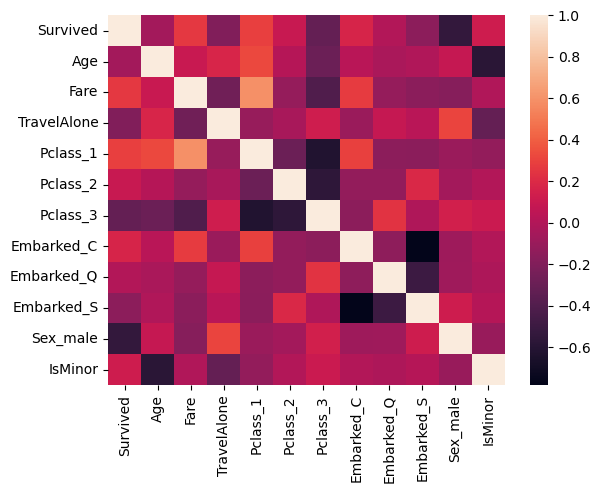

In [27]:
plt.figure()
sns.heatmap(df.corr())

In [28]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state=39,test_size=0.3)

<h1>DECISION TREE CLASSIFIER</h1>

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=20)

In [32]:
model.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_ = model.predict(test_X) # predictions of testing data
y__ = model.predict(train_X) # predictions of training data

In [35]:
train_score = accuracy_score(train_y,y__)
print(f'accuracy score for training data {train_score}')

accuracy score for training data 0.9839486356340289


In [36]:
test_score = accuracy_score(test_y,y_)
print(f'accuracy of test set: {test_score}')

accuracy of test set: 0.753731343283582


In [37]:
biasness = train_score - test_score
print(f'biasness: {biasness}')

biasness: 0.23021729235044686


# XGB

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_X,train_y)
y_ = model.predict(test_X)

In [39]:
XGBscore = accuracy_score(test_y,y_)
print(f'aacuracy Score after the eXtreme graident Boosting: {XGBscore}')

aacuracy Score after the eXtreme graident Boosting: 0.7873134328358209


# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_X, train_y)   

RandomForestClassifier()

In [ ]:
y_= model.predict(test_X)
y__ = model.predict(train_X)

In [ ]:
train_accuracy = accuracy_score(train_y,y__)
test_accuracy = accuracy_score(test_y,y_)
print(f'accuracy score for the training data: {train_accuracy}')
print(f'accuracy score for the testing data: {test_accuracy}')

accuracy score for the training data: 0.985553772070626
accuracy score for the testing data: 0.7835820895522388
